# Stress Detection with Machine Learning

<img src="images/stress.jpg" height="500">


Stress detection is a challenging task, as there are so many words that can be used by people on their posts that can show whether a person is having psychological stress or not. While looking for datasets that I can use to train a machine learning model for stress detection, I found a dataset on Kaggle with 116 columns. We only need to use the text and label column for this task.

The dataset I am using for this task contains data posted on subreddits related to mental health. This dataset contains various mental health problems shared by people about their life. Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress. So in the section below, I will take you through the task of stress detection in social media posts using Python.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")

## EDA - Exploratory Data Analysis

In [7]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,...,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,29.00,12.93,87.07,56.03,16.38,12.07,9.48,0.00,0.86,1.72,0.0,4.31,3.45,19.83,7.76,5.17,4.31,1.72,16.38,6.03,3.45,0.86,1.72,1.72,8.62,1.72,6.90,0.86,2.59,3.45,3.45,0.00,0.00,0.00,1.72,...,8.62,0.00,1.72,4.31,0.86,2.59,4.31,11.21,0.86,17.24,0.86,10.34,6.03,0.86,0.00,0.00,0.00,2.59,0.0,0.86,0.86,0.00,0.00,0.0,0.0,21.55,9.48,3.45,0.86,0.86,0.0,0.0,0.0,5.17,1.72,0.00,0.00,2.8571,2.6250,3.0,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,27.25,21.10,87.16,48.62,11.93,7.34,1.83,2.75,2.75,0.00,0.0,4.59,8.26,13.76,6.42,3.67,8.26,0.92,15.60,2.75,0.92,0.92,2.75,0.92,5.50,5.50,0.00,0.00,0.00,0.00,11.01,0.00,0.00,0.00,0.00,...,15.60,5.50,3.67,7.34,2.75,0.00,0.92,13.76,0.92,15.60,2.75,10.09,1.83,11.01,0.00,0.00,0.92,0.00,0.0,1.83,0.00,0.92,0.00,0.0,0.0,14.68,4.59,2.75,0.00,0.00,0.0,0.0,0.0,0.00,2.75,0.92,3.67,3.0000,2.8889,3.0,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,33.40,17.37,91.02,61.68,25.15,16.17,8.98,1.80,1.80,2.99,0.6,8.98,5.39,12.57,10.18,1.80,5.99,1.20,20.96,1.20,0.60,0.60,1.20,1.80,2.40,1.20,1.20,0.00,0.00,0.00,15.57,0.60,3.59,1.80,2.40,...,8.98,5.39,0.60,1.20,2.40,0.00,3.59,14.37,1.80,16.17,4.79,5.99,5.39,0.00,1.20,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10.78,2.40,3.59,0.00,0.00,0.6,0.0,0.0,2.40,1.80,0.00,0.00,2.7143,3.0000,3.0,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,54.60,8.06,98.90,65.57,30.40,23.44,16.12,0.37,0.37,6.59,0.0,6.96,3.30,9.16,8.79,6.59,9.89,3.66,20.88,3.66,1.83,1.10,0.00,1.10,8.79,5.86,2.93,0.00,0.37,0.73,13.55,0.37,1.10,0.37,8.06,...,6.59,4.03,0.00,0.73,1.10,0.73,7.69,13.19,1.10,10.99,1.83,3.30,6.23,0.73,0.37,0.37,0.00,0.00,0.0,2.56,0.00,0.73,0.73,0.0,0.0,12.09,2.56,7.33,0.00,0.00,0.0,0.0,0.0,1.47,0.00,0.73,0.00,3.0000,2.6364,3.0,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is 

In [8]:
df.shape

(2838, 116)

In [9]:
df.isnull().sum()   

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [11]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,...,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.00000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,33.428157,18.189475,14.858157,92.349292,58.598887,19.767699,13.987530,9.066254,0.764679,0.865772,2.708076,0.582667,5.76902,4.937636,13.356656,10.306311,6.045853,7.599056,2.262903,19.431293,4.362734,2.287287,1.608217,1.444151,2.246406,6.097400,2.697861,3.304732,0.914197,0.928534,0.598453,10.827523,0.745211,0.555233,1.576614,1.976875,13.594961,2.855109,1.726441,1.947185,...,7.885211,2.737364,1.372812,2.414334,1.368855,0.720137,5.058562,12.324027,1.183273,14.254221,2.004397,6.295144,6.199316,1.875694,0.785134,0.635113,0.786226,0.115662,0.141811,0.825655,0.246483,0.255201,0.119112,0.124767,0.049856,17.053650,6.066293,3.573312,0.218788,0.123428,0.519066,0.192491,0.486801,0.473513,3.176459,0.778961,1.444264,2.796964,2.704940,2.948414,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,35.334770,9.516060,5.531303,5.301902,6.852503,5.577772,4.792445,4.653986,1.564468,2.095719,3.611687,1.265140,3.22379,2.611391,3.649962,3.6497

## Feature Engineering

In [13]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text", "label"]]

In [18]:
df.head()

,text,label
0,"He said he had not felt that way before, sugge...",Stress
1,"Hey there r/assistance, Not sure if this is th...",No Stress
2,My mom then hit me with the newspaper and it s...,Stress
3,"until i met my new boyfriend, he is amazing, h...",Stress
4,October is Domestic Violence Awareness Month a...,Stress


## Remember

##### Things to consider when starting an NLP project

* Convert everything to lowercase
* remove punctuation marks
* remove digits
* remove line breaks \n
*  stopwords remove unnecessary words
* Tokenize
*  Remove suffixes and find roots with lemma and stemma
* Vectorize

In [19]:
import neattext.functions as nfx

In [23]:
df['text'] = df['text'].apply(lambda x: nfx.remove_special_characters(x))
df['text'] = df['text'].apply(nfx.remove_stopwords)
df['text'] = df['text'].apply(nfx.normalize)

In [25]:
df.head()

,text,label
0,said felt way suggeted rest trigger ahead youi...,Stress
1,hey rassistance sure right place post goes im ...,No Stress
2,mom hit newspaper shocked knows dont like play...,Stress
3,met new boyfriend amazing kind sweet good stud...,Stress
4,october domestic violence awareness month dome...,Stress


## Word Cloud

In [26]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [41]:
def wc(data, bgcolor, title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, stopwords= STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.title(title, fontsize = 20)
    plt.axis('off')

In [42]:
stress = df[df['label'] == 'Stress']['text']
nostress = df[df['label'] == 'No Stress']['text']

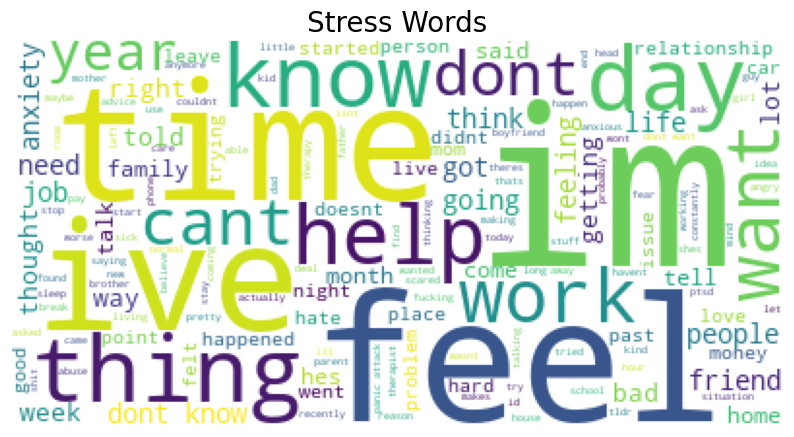

In [43]:
wc(stress, 'white', 'Stress Words')

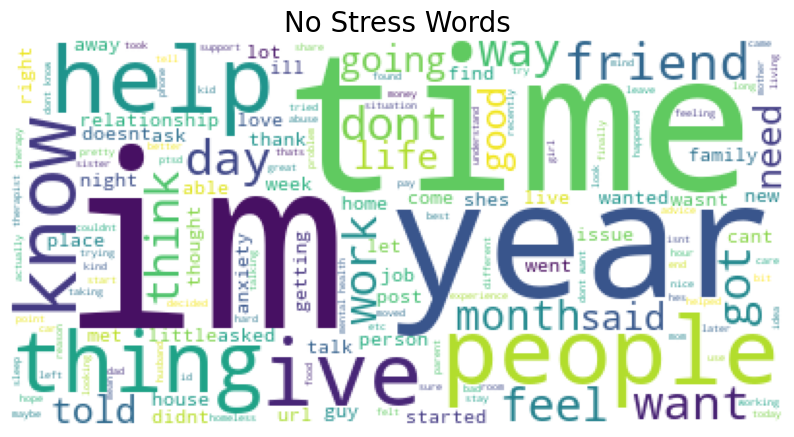

In [44]:
wc(nostress, 'white', 'No Stress Words')

In [45]:
def clean_text(text):
    text = nfx.remove_special_characters(text)  
    text = nfx.remove_stopwords(text)  
    text = nfx.remove_numbers(text)  
    text = nfx.normalize(text)
    return text

In [46]:
df['text'] = [clean_text(text) for text in df['text']]

In [47]:
from sklearn.model_selection import train_test_split
x = df['text']
y = df['label']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB


In [87]:
model_pipeline = Pipeline([
    ('tfidfvectorizer', TfidfVectorizer(preprocessor=clean_text)), 
    ('clf', BernoulliNB()) 
])

In [88]:
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(preprocessor=<function clean_text at 0x30ae94e00>)),
                ('clf', BernoulliNB())])

In [89]:
y_pred = model_pipeline.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7411971830985915

In [93]:
text = "I am feeling so stressed out with all the work I have to do"
prediction = model_pipeline.predict([text])
prediction

array(['Stress'], dtype='<U9')

In [94]:
text = "I am feeling happy today"
prediction = model_pipeline.predict([text])
prediction

array(['No Stress'], dtype='<U9')

In [95]:
from joblib import dump
dump(model_pipeline, 'model.joblib')

['model.joblib']